Fetching Dataset


In [2]:
from sklearn.datasets import fetch_covtype
import pandas as pd

data = fetch_covtype()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)


In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y.head()

,0
0,5
1,5
2,2
3,2
4,5


In [12]:
# Check for NaN or null values
print("Any NaN in X:", X.isna().sum().sum() > 0)
print("Any NaN in y:", y.isna().sum().sum() > 0)

# Check data ranges
print("Feature ranges (min to max):")
print(X.describe().loc[['min', 'max']])

Any NaN in X: False
Any NaN in y: False
Feature ranges (min to max):
         0      1     2       3      4       5      6      7      8       9   \
min  1859.0    0.0   0.0     0.0 -173.0     0.0    0.0    0.0    0.0     0.0   
max  3858.0  360.0  66.0  1397.0  601.0  7117.0  254.0  254.0  254.0  7173.0   

     ...   44   45   46   47   48   49   50   51   52   53  
min  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
max  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 54 columns]


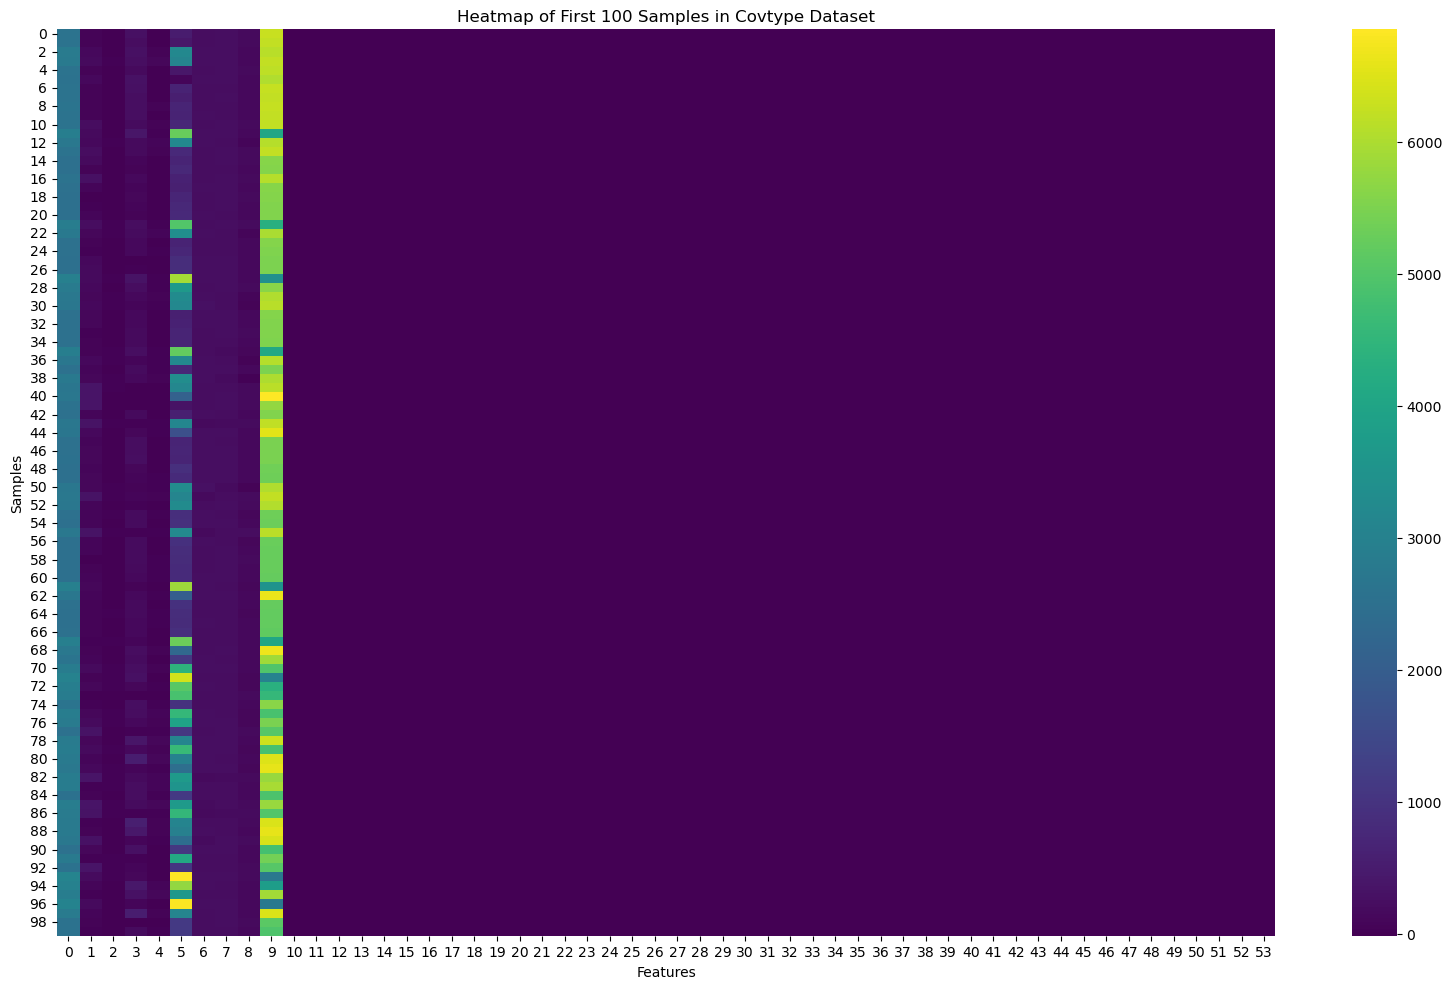

In [14]:
import seaborn as sns


# Sample the first 100 rows for visualization
X_sample = X.iloc[:100]

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(X_sample, cmap="viridis", cbar=True)
plt.title("Heatmap of First 100 Samples in Covtype Dataset")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()

In [15]:
# Select columns 10 to end
X_bin = X.iloc[:, 10:]

# Check which columns are strictly binary (only 0 and 1)
binary_check = X_bin.apply(lambda col: set(col.unique()).issubset({0, 1}))

# Check which columns are all zero
all_zero_check = X_bin.apply(lambda col: col.nunique() == 1 and col.unique()[0] == 0)

# Print summary
print("Binary columns from index 10 onward:")
print(binary_check[binary_check].index.tolist())

print("\nColumns that are all zero:")
print(all_zero_check[all_zero_check].index.tolist())

Binary columns from index 10 onward:
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]

Columns that are all zero:
[]


In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np


# Separate continuous and binary features
X_cont = X.iloc[:, :10]     # Continuous columns
X_bin = X.iloc[:, 10:]      # Binary columns

# Scale continuous features
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)

# Combine scaled continuous and binary features
X_final = np.hstack((X_cont_scaled, X_bin))

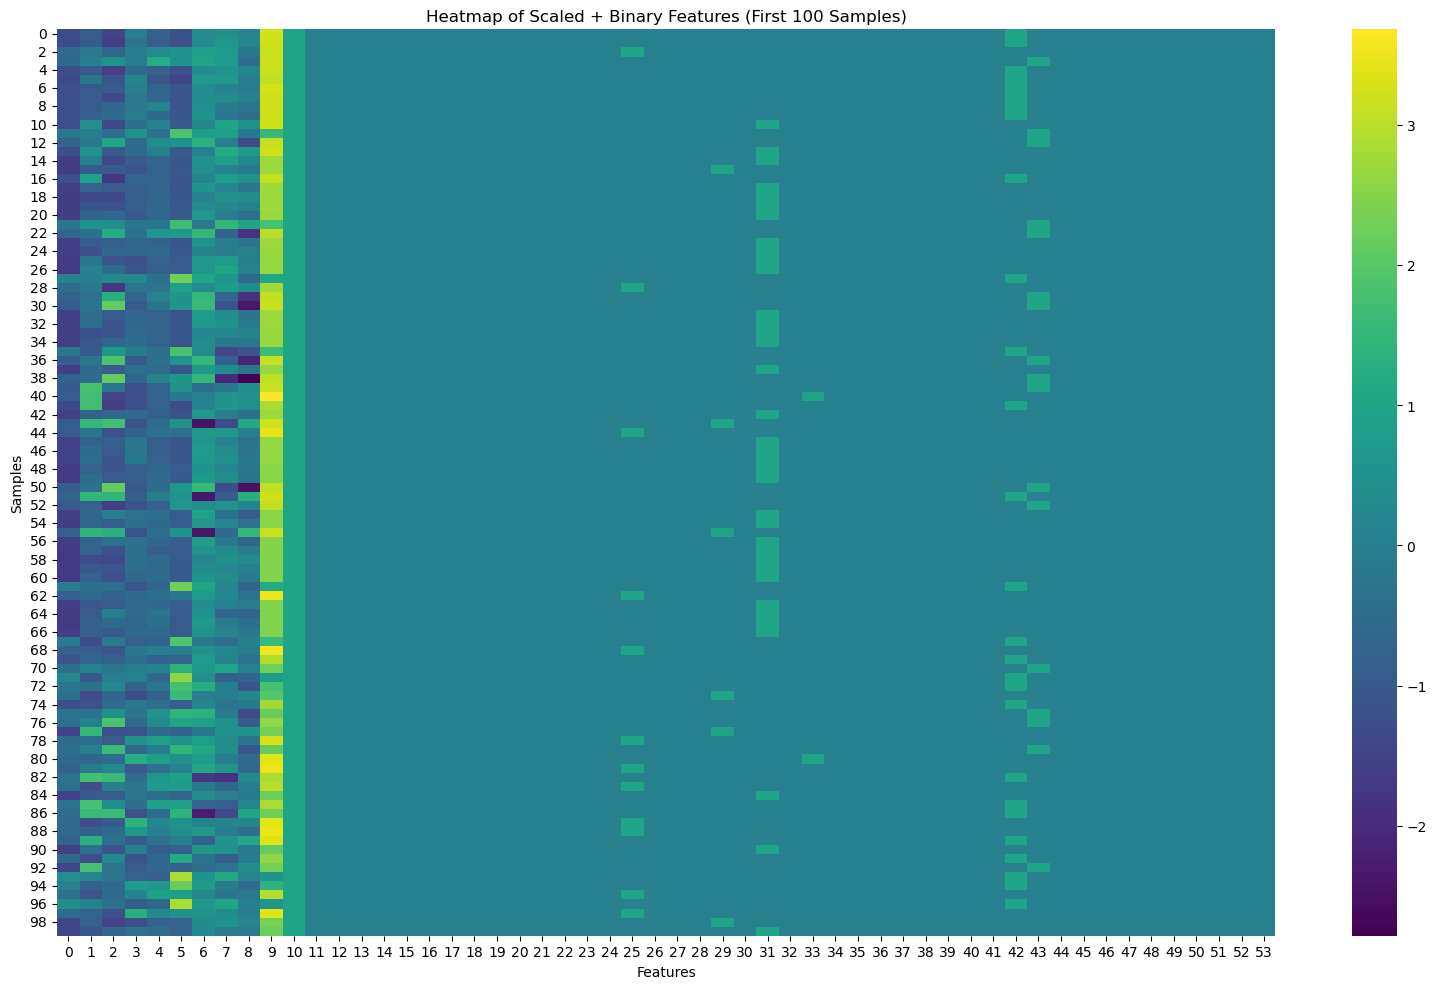

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from X_final for plotting (first 100 samples)
X_final_df = pd.DataFrame(X_final)
X_sample = X_final_df.iloc[:100]

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(X_sample, cmap="viridis", cbar=True)
plt.title("Heatmap of Scaled + Binary Features (First 100 Samples)")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()


Split into train and test

In [22]:
from sklearn.model_selection import train_test_split


# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)



In [23]:
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))


Length of X_train: 464809
Length of X_test: 116203
Length of y_train: 464809
Length of y_test: 116203


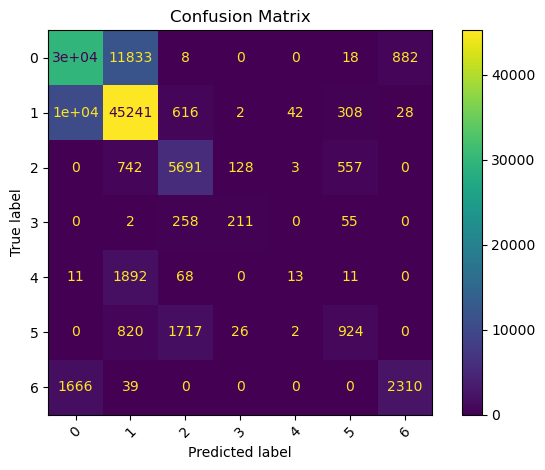

Accuracy: 0.7246456631928607
Precision: 0.7123276648670798
Recall: 0.7246456631928607
F1 Score: 0.7146470068212984


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Flatten y for compatibility with sklearn models
y_train = y_train.ravel()
y_test = y_test.ravel()

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate with four metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

# Create confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [33]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print it
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.68      0.80      0.74      7121
           4       0.57      0.40      0.47       526
           5       0.22      0.01      0.01      1995
           6       0.49      0.26      0.34      3489
           7       0.72      0.58      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



Decision Tree Evaluation:
Accuracy: 0.9387881552111391
Precision: 0.9387625044465002
Recall: 0.9387881552111391
F1 Score: 0.9387709857599738

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.85      0.81      0.83       526
           5       0.84      0.83      0.83      1995
           6       0.88      0.88      0.88      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



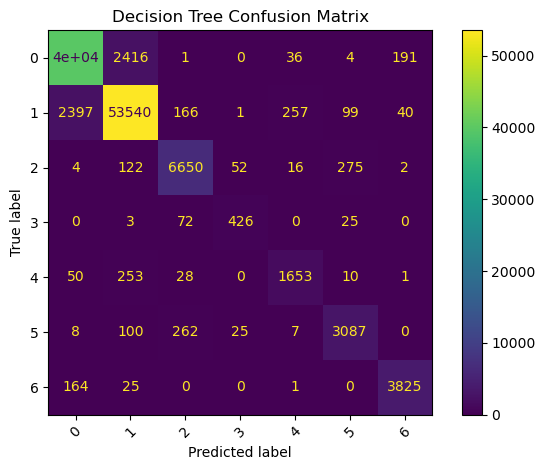

In [34]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = fetch_covtype()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

# Separate features
X_cont = X.iloc[:, :10]       # Continuous
X_bin = X.iloc[:, 10:]        # Binary

# Scale continuous features
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)

# Combine scaled + binary
X_final = np.hstack((X_cont_scaled, X_bin))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Train decision tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred = dtree.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Print metrics
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.show()


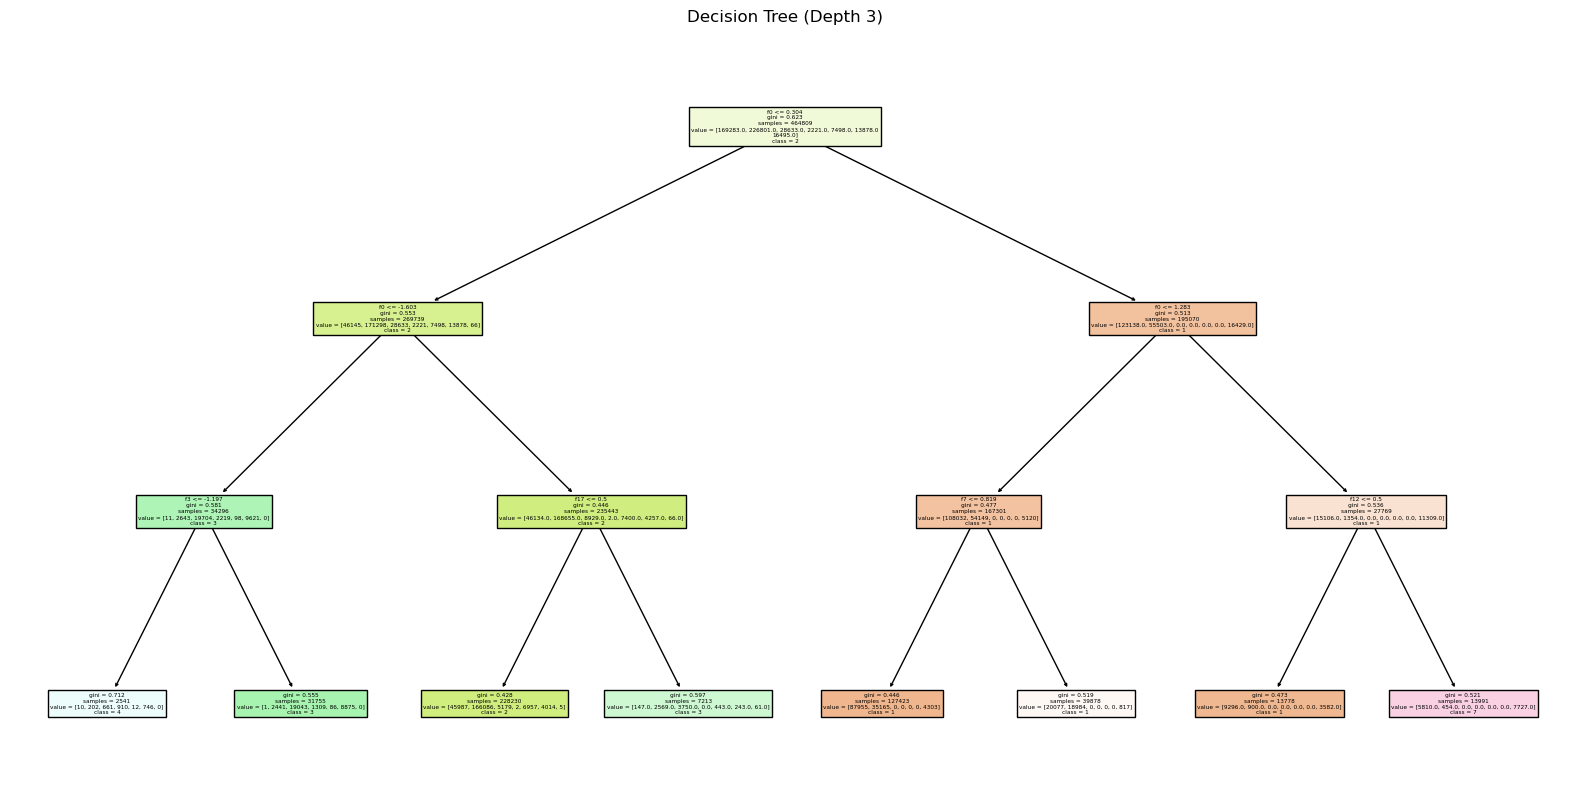

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit depth of tree for visualization (optional)
dtree_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_viz.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dtree_viz, filled=True, feature_names=[f"f{i}" for i in range(X_train.shape[1])], class_names=[str(i) for i in np.unique(y_train)])
plt.title("Decision Tree (Depth 3)")
plt.show()


In [37]:
# 6. Feature Importance
importances = dtree.feature_importances_
important_features = sorted(zip(importances, [f"f{i}" for i in range(X_train.shape[1])]), reverse=True)[:10]

print("\n=== Decision Tree Evaluation ===")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision (wtd): {precision:.4f}")
print(f"Recall (wtd)   : {recall:.4f}")
print(f"F1 Score (wtd) : {f1:.4f}")
print("\nClassification Report:\n", report)

print("Top 10 Most Important Features:")
for score, name in important_features:
    print(f"{name}: {score:.4f}")



=== Decision Tree Evaluation ===
Accuracy       : 0.9388
Precision (wtd): 0.9388
Recall (wtd)   : 0.9388
F1 Score (wtd) : 0.9388

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.85      0.81      0.83       526
           5       0.84      0.83      0.83      1995
           6       0.88      0.88      0.88      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203

Top 10 Most Important Features:
f0: 0.3377
f5: 0.1491
f9: 0.1437
f3: 0.0624
f4: 0.0435
f7: 0.0325
f6: 0.0296
f1: 0.0269
f8: 0.0247
f2: 0.0151


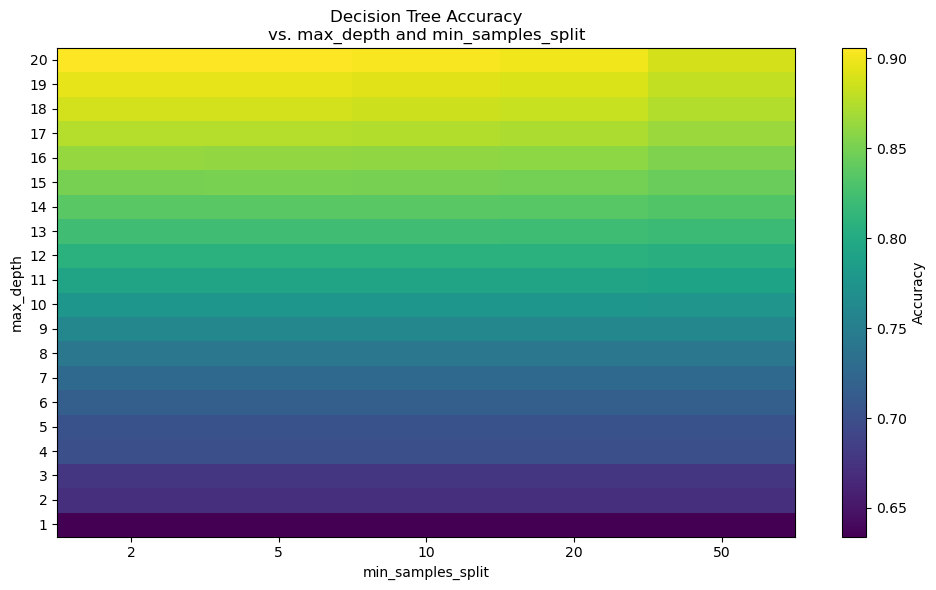

In [38]:
# Define hyperparameter ranges
max_depth_values = range(1, 21)
min_samples_split_values = [2, 5, 10, 20, 50]

# Store accuracy results
results = []
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "accuracy": accuracy
        })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Create a pivot table for heatmap
pivot_table = results_df.pivot(index="max_depth", columns="min_samples_split", values="accuracy")

# Plot heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(pivot_table, aspect='auto', cmap="viridis", origin="lower")
plt.colorbar(heatmap, label="Accuracy")
plt.xticks(ticks=range(len(min_samples_split_values)), labels=min_samples_split_values)
plt.yticks(ticks=range(len(max_depth_values)), labels=max_depth_values)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("Decision Tree Accuracy\nvs. max_depth and min_samples_split")
plt.tight_layout()
plt.show()